In [33]:
import cirq
import numpy as np
from cirq import Simulator
from cirq.ops import CZ, H, S, CNOT,I
from cirq.circuits import InsertStrategy
from random import choices
from random import sample
import itertools
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
from scipy.linalg import fractional_matrix_power

In [34]:
num_qubits=3
nreal=1000
noise=0.0

In [35]:
#qmeas
l = range(num_qubits*num_qubits)
l1=[]
l2=[]
for j in range(0,num_qubits*num_qubits,num_qubits):
    l1.append(j)
    l2.append(j+num_qubits-1)

In [36]:
qmeas=[]
for i in range(len(l)):
    
    if (i not in l1 and i not in l2):
        dummy=[]
        dummy.append(i)
        if (i-num_qubits in l):
            dummy.append(i-num_qubits)
        if (i-1 in l):
            dummy.append(i-1)
        if (i+1 in l):
            dummy.append(i+1)
        if (i+num_qubits in l):
            dummy.append(i+num_qubits)
        qmeas.append(dummy)
   
    elif(i in l1 ):
        dummy=[]
        dummy.append(i)
        if (i-num_qubits in l):
            dummy.append(i-num_qubits)
        #if (i-1 in l):
            #dummy.append(i-1)
        if (i+1 in l):
            dummy.append(i+1)
        if (i+num_qubits in l):
            dummy.append(i+num_qubits)
        qmeas.append(dummy)
        
    elif(i in l2 ):
        dummy=[]
        dummy.append(i)
        if (i-num_qubits in l):
            dummy.append(i-num_qubits)
        if (i-1 in l):
            dummy.append(i-1)
        #if (i+1 in l):
            #dummy.append(i+1)
        if (i+num_qubits in l):
            dummy.append(i+num_qubits)
        qmeas.append(dummy)

In [37]:
qmeas

[[0, 1, 3],
 [1, 0, 2, 4],
 [2, 1, 5],
 [3, 0, 4, 6],
 [4, 1, 3, 5, 7],
 [5, 2, 4, 8],
 [6, 3, 7],
 [7, 4, 6, 8],
 [8, 5, 7]]

In [38]:
#np.savez("Data_cluster_stablizer/ghz_q16_qmeas.npz",input3=qmeas)

In [39]:
# Build a n*n grid
q=[]
for i in range(num_qubits):
    [q.append(cirq.GridQubit(i, j))for j in range(num_qubits)] 

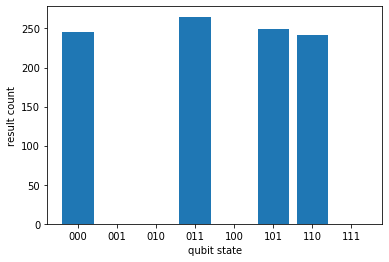

(1000, 3)


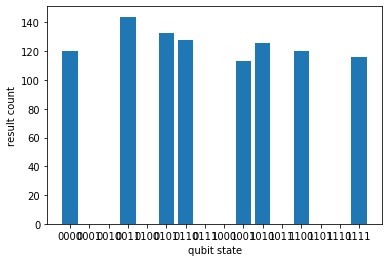

(1000, 4)


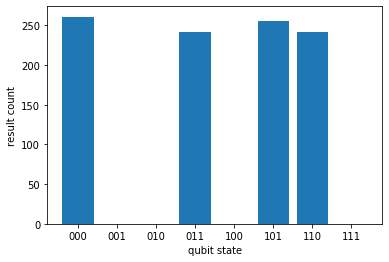

(1000, 3)


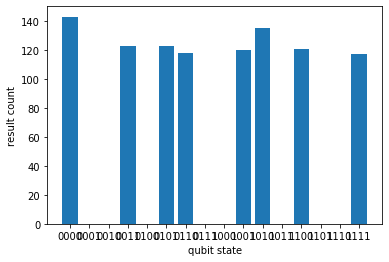

(1000, 4)


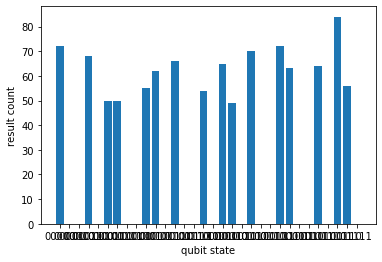

(1000, 5)


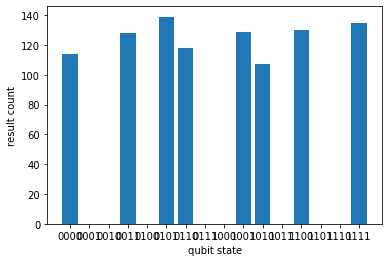

(1000, 4)


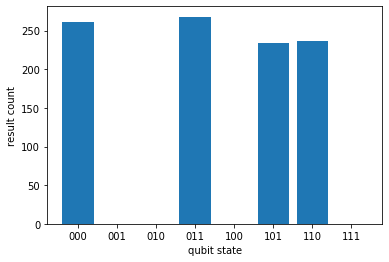

(1000, 3)


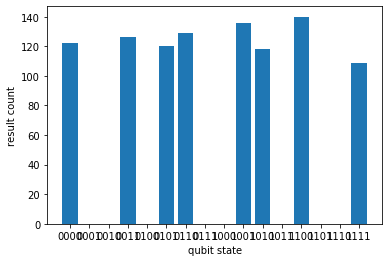

(1000, 4)


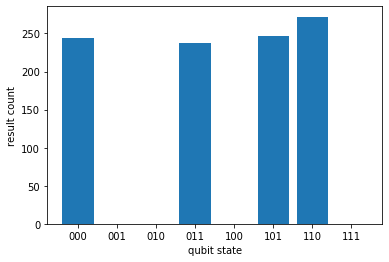

(1000, 3)


In [48]:
par=[]
for k in range(len(qmeas)):
#for k in range(1):    
    circuit_2DC= cirq.Circuit()
    for i in range(len(q)):
        circuit_2DC.append(H(q[i]))
        
    for i in range(0,len(q)-1,num_qubits):
        for j in range(0,num_qubits-1):
            circuit_2DC .append([CZ(q[i+j], q[i+j+1])],strategy=InsertStrategy.EARLIEST)
            #circuit_2DC .append([CZ(q[i+1], q[i+2])],strategy=InsertStrategy.EARLIEST)
        
    for i in range(0,len(q)-num_qubits):
        circuit_2DC .append([CZ(q[i], q[i+num_qubits])],strategy=InsertStrategy.NEW)
        

        
    if 1==0:
        list1=np.arange(0,3).tolist()
        for i in range(len(q)):
            k=(random.choice(list1)) 
            angle=k*np.pi/4
            if i==0:
                circuit_2DC.append(cirq.Rz(angle)(q[i]),strategy=InsertStrategy.NEW) 
            else:
                circuit_2DC.append(cirq.Rz(angle)(q[i]),strategy=InsertStrategy.INLINE) 
            
    for i in range(len(q)):      
        if i==0:
            circuit_2DC.append(cirq.depolarize(p=noise)(q[i]),strategy=InsertStrategy.NEW)
            #circuit.append(cirq.amplitude_damp(noise)(q[i]),strategy=InsertStrategy.NEW)
        else:
            circuit_2DC.append(cirq.depolarize(p=noise)(q[i]),strategy=InsertStrategy.INLINE)
            #circuit.append(cirq.amplitude_damp(noise)(q[i]),strategy=InsertStrategy.INLINE)
            
    for i in range(0,len(q)):
        if i==k:
            circuit_2DC.append(H(q[i])) 
        else:
            circuit_2DC.append(I(q[i])) 
    
    
    circuit_meas=circuit_2DC
    
    #Old method
    
    #for i in range(len(qmeas[k])):
        #circuit_meas.append(cirq.measure(q[qmeas[k][i]], key='x'))
    ##print(circuit_2DC)
    
    
    #simulator_meas_DP = cirq.Simulator()
    #result_meas_DP = simulator_meas_DP.run(circuit_meas, repetitions=nreal)
    #result_meas=result_meas_DP
    
    ##simulator_meas_DP = cirq.DensityMatrixSimulator()
    ##result_meas_DP =  simulator_meas_DP.run(circuit_meas, repetitions=nreal)
    ##result_meas=result_meas_DP   

    #counts=print(result_meas.histogram(key='x'))
    #outputlogical=result_meas.measurements.get("x")
    ## output=int(outputlogical=='True')
    #output1=outputlogical*1;
    #output2=output1.T
    #output3=np.transpose(output2)
    #print(output3.shape)
    #np.savez("Data_cluster_stablizer/cls_q25_DP"+str(noise)+"_qubit"+str(k)+".npz",input3=output3)
    ##np.savez("Data_pure_random_t8/pure_q8_AD"+str(noise)+"_m"+str(k+1)+"_depth"+str(j+1)+".npz",input3=output3)
    
    
   ##New method

    for i in range(len(qmeas[k])):
        circuit_meas.append(cirq.measure(q[qmeas[k][i]]))
        
        
    simulator_meas_DP = cirq.Simulator()
    result_meas_DP = simulator_meas_DP.run(circuit_meas, repetitions=nreal)
    result_meas=result_meas_DP
    values=cirq.plot_state_histogram(result_meas)    
    
    count_new={}
    for i,cont in enumerate(values):
        if cont!=0:
            count_new[i]=cont
    count_new
        
        
    key_list=list(result_meas.measurements.keys())
    result_array=[]
    for i in range(len(key_list)):
        result_array.append(result_meas.measurements.get(key_list[i]))
    output1=np.array(result_array)
    output2=output1.T;
    shape=output2.shape;
    output3=np.reshape(output2,(shape[1],shape[2]))
    print(output3.shape)
    #np.savez(Data_GHZ/Data_GHZ_Stablizer_rand/ghz_q8_AD"/ghz_q8_DP"+str(noise)+"m"+str(k)+"_sample"+".npz",input3=output3)
    
    ev_li = []
    od_li = []
    for xx in range(0, len(output3)):

        s=np.sum(output3[xx])
        if (s % 2 == 0): 
            pp1=1
            ev_li.append(pp1)
        else: 
            pp2=-1
            od_li.append(pp2)
        #print(pp)
    parity=(np.sum(ev_li)+np.sum(od_li))/len(output3)
    print(parity)

    par_list.append(parity)
  